Este colab fue desarrollado por Arnold Charry Armero.

# EOQ con Descuentos (Economic Order Quantity) - Descuento Directo

Por lo general, a medida que se ordena una mayor cantidad (volumen de producción), se obtiene un mayor descuento en el precio del producto; esto es, el precio por unidad $c$ disminuye progresivamente. Muchas empresas aceptan este descuento sin analizar si realmente es la decisión correcta. Esto porque a pesar de que se tiene un ahorro por la disminución en el precio, se aumentan los costos de mantener las unidades en inventario (Sipper & Bulfin, 1998). Por lo tanto, no es una decisión que se pueda tomar sin realizar varios cálculos que la respalden. En este colab de Python se explorará cómo seleccionar la cantidad óptima de lote en el caso de que se tenga un descuento para todas las unidades.

**Supuestos:**

*   Existe un solo producto en el sistema de inventarios
*   La demanda es uniforme y determinística
*   No se permiten faltantes
*   No hay un tiempo de entrega
*   Tasa de reabastecimiento infinita, es decir, toda la cantidad ordenada llega al mismo tiempo.
*   El precio cambia a medida que aumenta la cantidad de lote a ordenar




## Descuento en Todas las Unidades

En este caso, apenas se sobrepase el límite fijado por el proveedor, todas las unidades sin excepciones tendrán determinado costo. Esto es, todas las unidades cuestan $c$ precio.

Gráficamente se puede observar de la siguiente manera,

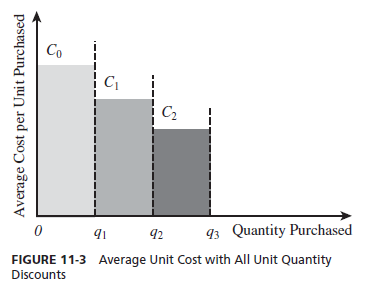

Matemáticamente, el modelo se expresa como una función a trozos de la siguiente manera:

$$ K(Q)= \begin{cases}
c_{1}D + \frac{AD}{Q}+h_{1}\frac{Q}{2} & \text{ si }q_{0}\leq  Q < q_{1} \\
c_{2}D + \frac{AD}{Q}+h_{2}\frac{Q}{2} & \text{ si }q_{1}\leq  Q < q_{2}\\
c_{3}D + \frac{AD}{Q}+h_{3}\frac{Q}{2} & \text{ si }  Q \geq q_{2}
\end{cases} $$

donde,

$ Q = \mathrm{Cantidad \:de \: lote \: a \: ordenar} $

$ c_{j} = \mathrm{Costo \: unitario \:} j \mathrm{\: de \: compra} $

$ D = \mathrm{Tasa \:de \: demanda} $

$ A = \mathrm{Costo \:unitario \: de \: ordenar} $

$ h_{j} = \mathrm{Costo \:unitario \:} j \mathrm{\: de \: mantener \: en \: inventario} $

$ K = \mathrm{Costo \: total \: promedio} $

Para saber la cantidad óptima de lote a ordenar, se debe derivar la función e igualar a 0. Matemáticamente se expresa esto de la siguiente manera,

$$ \frac{dK(Q)}{dQ}= -\frac{AD}{Q^{2}}+\frac{h_{j}}{2}=0 $$

Despejando $Q$,

$$ Q^{*} = \sqrt{\frac{2AD}{h_{j}}} $$

Para saber cuál es el óptimo global de la función, se debe de utilizar esta formula para cada uno de los intervalos. Una vez obtenido el valor óptimo ideal, se revisa si está dentro del intervalo. En caso de que no este, se calcula el costo para los extremos y se selecciona el que de el menor intervalo. Finalmente, se comparan los óptimos de cada intervalo y se selecciona el menor. Ahora se continua con la implementación en código resolviendo el siguiente ejemplo.

**Ejemplo 6-6. Descuentos por cantidad.** Coldpoint es un fabricante de electrodomésticos. La
compañía compra cierta componente para sus productos. Southern Electronics y Electro Tech son
dos compañías que producen esta componente, y sus productos y servicios son iguales, de manera
que comprarán la componente con base sólo en el costo. Ambas compañías ofrecen descuentos por
cantidad según el tamaño de la orden. No obstante, estas dos empresas tienen diferentes planes de
precios. En Southern Electronics, si la cantidad ordenada es menor que 500 unidades, el precio es
$\$0.60$ por unidad; si la cantidad es 500 o más, pero menos de 1000, el precio unitario es $\$0.58$;
cualquier cantidad mayor o igual a 1000 unidades tiene un precio unitario de $\$0.56$. ElectroTech
ofrece el mismo rango de precios y cantidades; sin embargo, la tasa de descuento se aplica sólo a la
cantidad ordenada en exceso. Es decir, si la cantidad ordenada es 500 unidades, las primeras 499
cuestan $\$0.60$ y la que sigue cuesta $\$0.58$. Si se ordenan 1000 unidades, las primeras 499 cuestan
$\$0.60$ y las siguientes 500 [500,999] cuestan $\$0.58$. Cualquier cantidad mayor o igual a 1000 cuesta
$\$0.56$. La tabla 6-1 describe los dos planes de precios.

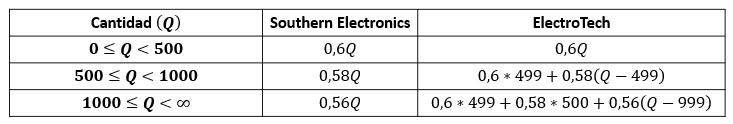

**Ejemplo 6-7- Descuento en todas las unidades.** Continuamos con el ejemplo de Coldpoint. La
compañía estima que el costo de colocar una orden es $\$20$ y que la demanda anual uniforme para este
subcomponente es 800 unidades. El costo de mantener el inventario es $20$% anual. Se desea encontrar
la mejor política de compra si la subcomponente se ordena a Southern Electronics.

In [2]:
#Se importan las librerias
import scipy.optimize as optimize
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Se definen los parámetros.
c1 = 0.6
c2 = 0.58
c3 = 0.56
D = 800
A = 20
i = 0.2
h1 = c1 * i
h2 = c2 * i
h3 = c3 * i
q0 = 0
q1 = 500
q2 = 1000

In [4]:
#Se define la función
def K_piecewise(Q):
  """
  Calcula el costo total promedio tomando en
  cuenta el tamaño de lote Q ingresado

  Args:
    Q: Tamaño de lote seleccionado.

  Returns:
    K_piecewise: Costo total promedio
  """
  if Q >= q0 and Q < q1:
    return c1*D + (A*D)/ Q + h1*(Q/2)
  elif Q >= q1 and Q < q2:
    return c2*D + (A*D)/ Q + h2*(Q/2)
  elif Q >= q2:
    return c3*D + (A*D)/ Q + h3*(Q/2)

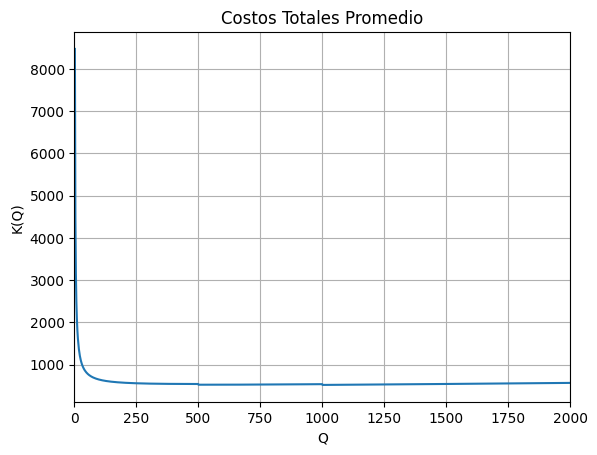

In [5]:
#Se grafica la función para entender mejor su comportamiento
x = np.linspace(0, 2000, 1000)
y = [K_piecewise(Q) for Q in x]
plt.grid()
plt.title("Costos Totales Promedio")
plt.xlim(0, 2000)
plt.xlabel('Q')
plt.ylabel('K(Q)')
plt.plot(x, y)

Para ver de una mejor manera los cambios en la gráfica, se utilizarán los tres intervalos por separado.

In [6]:
#Interval 1
def interval_funct1(x):
  return c1*D + A*D/x + i*c1*x/2

#Interval 2
def interval_funct2(x):
  return c2*D + A*D/x + i*c2*x/2

#Interval 3
def interval_funct3(x):
  return c3*D + A*D/x + i*c3*x/2

Text(0, 0.5, 'K(Q)')

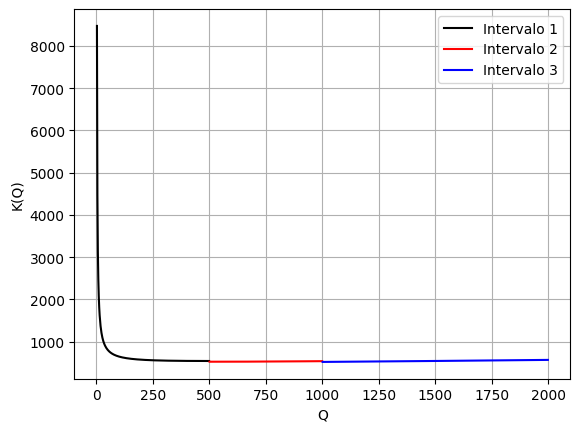

In [7]:
#Gráfica
x = np.linspace(0,2000,1000)
y = np.piecewise(x, [(q0 < x) & (x < q1), (q1 <= x) & (x < q2), (q2 <= x) & (x < 2000)],
                 [lambda x: interval_funct1(x), lambda x: interval_funct2(x), lambda x: interval_funct3(x)])

interval_funct1 = np.vectorize(interval_funct1)

plt.plot(x[(q0 < x) & (x < q1)], interval_funct1(x[(q0 < x) & (x < q1)]), label = "Intervalo 1", c = "black")
plt.plot(x[(q1 <= x) & (x < q2)], interval_funct2(x[(q1 <= x) & (x < q2)]), label="Intervalo 2", c = "red")
plt.plot(x[(q2 <= x) & (x < 2000)], interval_funct3(x[(q2 <= x) & (x < 2000)]), label="Intervalo 3", c = "blue")

plt.grid(True)
plt.legend()
plt.xlabel('Q')
plt.ylabel('K(Q)')

In [8]:
#Se define la función del EOQ
def EOQ_function(c, D, A, i, Q):
  """
  Calcula el costo total promedio tomando en
  cuenta el tamaño de lote Q ingresado

  Args:
    c: Costo unitario del producto
    D: Tasa de Demanda
    A: Costo unitario de ordenar
    el producto
    i: Porcentaje de mantener en
    inventario
    Q: Tamaño de lote seleccionado.

  Returns:
    K: Costo total promedio
  """
  if Q == 0:
    return np.inf
  h = i * c #Costo de mantener el inventario
  return c*D + (A*D)/ Q + h*(Q/2)

Se desarrolla el algoritmo,

In [9]:
#Se utilizan bucles y listas
C = [c1, c2, c3]
q = [q0, q1, q2, 2000]
Q = []
K = []

#Este bucle calculará el óptimo en cada intervalo
#Y lo comparará con los límites.
for j in range(len(C)):
  x0 = 50
  def total_cost(Q):
    cost = EOQ_function(C[j], 800, 20, 0.2, x0)
    return cost
  result = optimize.minimize(total_cost, x0, method = 'SLSQP')
  if result.x[0] >= q[j] and result.x[0] < q[j + 1]:
    Q.append(result.x[0])
    K.append(result.fun)
  else:
    LI = EOQ_function(C[j], 800, 20, 0.2, q[j])
    LS = EOQ_function(C[j], 800, 20, 0.2, q[j + 1] - 1)
    if LI < LS:
      Q.append(q[j])
      K.append(LI)
    else:
      Q.append(q[j + 1] - 1)
      K.append(LS)

In [10]:
#Se le pide a Python que nos indique el mínimo
#en todos los intervalos

min_Q = 0
min_c = 0
min_K = None

for j in range(len(K)):
  if min_K is None or min_K > K[j]:
    min_K = K[j]
    min_Q = Q[j]
    min_c = C[j]

In [11]:
#Resultados
print("-----RESULTADOS-----")
print("La cantidad óptima a ordenar es de {} unidades.".format(min_Q))
print("El precio unitario utilizado es de ${}.".format(min_c))
print("El costo total minimizado es de ${}.".format(min_K))

-----RESULTADOS-----
La cantidad óptima a ordenar es de 1000 unidades.
El precio unitario utilizado es de $0.56.
El costo total minimizado es de $520.0000000000001.


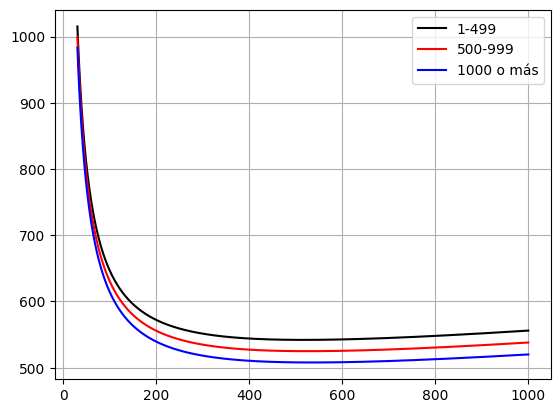

In [14]:
#Se imprimen todas las gráficas
x1 = np.linspace(30, 1000, 10000)
plt.plot(x1, interval_funct1(x1), color = "black", label = "1-499")
x2 = np.linspace(30, 1000, 10000)
plt.plot(x2, interval_funct2(x2), color = "red", label = "500-999")
x3 = np.linspace(30, 1000, 10000)
plt.plot(x3, interval_funct3(x3), color = "blue", label = "1000 o más")
plt.legend(loc = 'best')
plt.grid()
plt.show()

De esta manera, queda por concluido el tema del EOQ con Descuentos para todas las unidades.

#### Referencias


*  Chopra, S., & Meindl, P. (2016). Supply chain management: Strategy, planning, and operation, global edition (6th ed.). Pearson Education.
*   Sipper, D., & Bulfin, R. L. (1998). Planeación y control de la producción.
*   Stewart, J. (2018). Cálculo de una variable: trascendentes tempranas.


